# Maximum Likelihood Estimation 📈

## Power Laws 🌟
In the first lecture, we learned what a **Power Law** is.
> To Remind You:
>
> It is a distribution where the probability decays slowly like $p(x) ∝ x^{-\alpha}$

We learned how to correctly display graphs of the Power Laws:

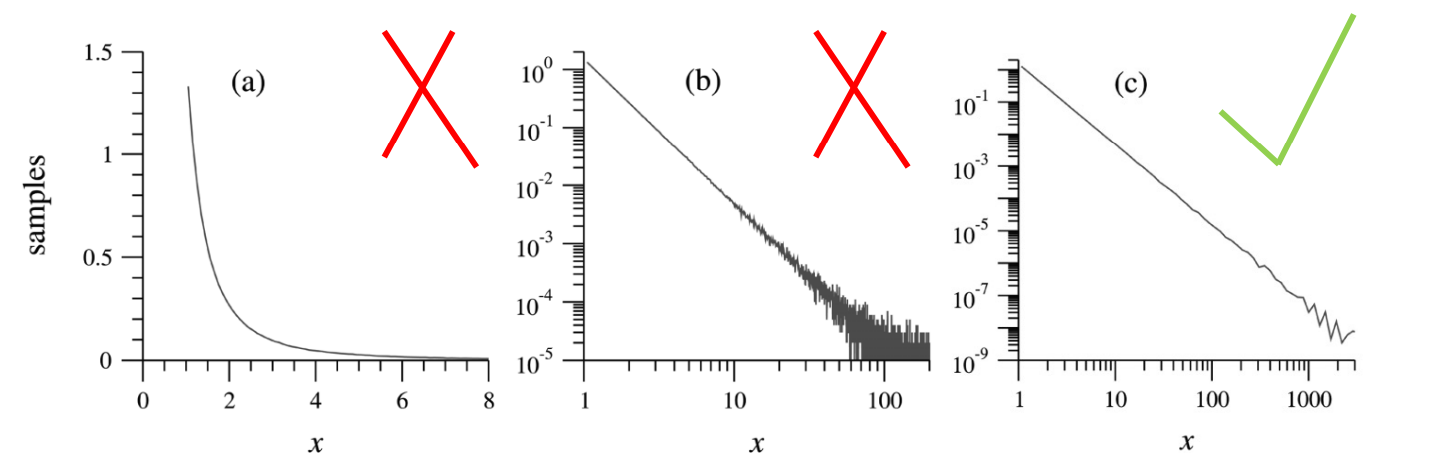

*Graph a:* it doesn't represent a log-log plot, so it doesn't necessarily reflect a power-law behavior.

*Graph b:* the binning is linear instead of log binning. This can be seen from the high noise level in the plot, which indicates that the number of samples per bin is too small.

**In other words: you can change the binning or the range and make it
look like a power law when it’s not.**

*Graph c:* it uses log binning, so each bin receives a reasonable number of measurements.

This shows that the appearance of the graph depends on the choice of binning.
So we need a mathematical tool that doesn't rely on the graph at all.
We need a tool that calculates the best-fitting exponent $\alpha$ in a precise and objective way.

No tricks, no binning, no visual illusions.

## Introduction to MLE 📐
**What is the difference between probability and likelihood?**

*Probability* asks: Given a fixed model, what is the chance of observing this data?

Example: if $\alpha = 2.5$, what is the probability of observing $x=10$?

*Likelihood* asks: Given observed data, which model parameter makes this data most likely?

Example: I observed $x = 10,15,20$. whic value of $\alpha$ makes this observation most likely?

## What is MLE? 🧠
MLE helps us find the parameter values that make the data we observed most likely, based on a model we assume. It answers the question:

**What value of the parameter makes this outcome the most probable?**

## General Steps for MLE 🧭
**Steps to Apply MLE:**
1. Define your probabilistic model (e.g., Binomial, Normal).
2. Write the likelihood function based on the model and data. for example: $ P(x_1=a_1, x_2=a_2, ..., x_n=a_n|\theta)$

  *This function describes the probability of the observed data, given specific values of the parameters we’re trying to estimate.*
3. Take the log of the likelihood function to simplify.
4. Differentiate the log-likelihood with respect to the parameter.
5. Solve for the parameter that maximizes the log-likelihood.

Now, let's apply these steps to real examples!

> 💡 Taking the **log** transforms products into sums and it is easier to differentiate. In addition, **log** is a monotonic increasing function, so it preserves the location of the maximum.

## Simple Example - Coin Toss 🪙
**We flipped a coin 10 times and got 7 heads and 3 tails.**

Let θ be the probability of getting heads.

First, we can see that the probabilistic model is a **Binomial distribution**:
$$
X \sim \text{Binomial}(n=10, \theta)
$$
We flipped the coin 10 times.

The **likelihood** function is:
$$
L(\theta) = \binom{10}{7} \cdot \theta^7 \cdot (1 - \theta)^3
$$

Now, taking the **log-likelihood:**
$$
\ell(\theta) = \log\left(\binom{10}{7}\right)+7 \log(\theta) + 3 \log(1 - \theta)
$$
Find the maximum:
$$
\frac{d\ell}{d\theta} = \frac{7}{\theta} - \frac{3}{1 - \theta} = 0
\Rightarrow \hat{\theta}_{MLE} = 0.7
$$
This means the most likely value of θ, based on our data, is **0.7**.

So... do you think 10 tosses are enough to trust this result?

📌 Important points:

- MLE isn't about truth - it's about best guesses. If we only saw 10 tosses, we can't be sure whether the coin is fair or not.
- MLE just says: **'Given the data, 0.7 makes the most sense right now..'**
- **NOTE:** more data = better estimation. If you flip 1,000 times and get 500 heads, MLE will say 0.5

**Another point:** As you can see, the constant $\binom{10}{7}$ has no effect on the maximization, so we can ignore it. Therefore, the likelihood function is: $ L(\theta) = \theta^7 \cdot (1 - \theta)^3 ⇒ \ell(\theta) = 7 \log(\theta) + 3 \log(1 - \theta)$

Let's visualize how the likelihood function looks for one specific outcome: 7 heads and 3 tails.

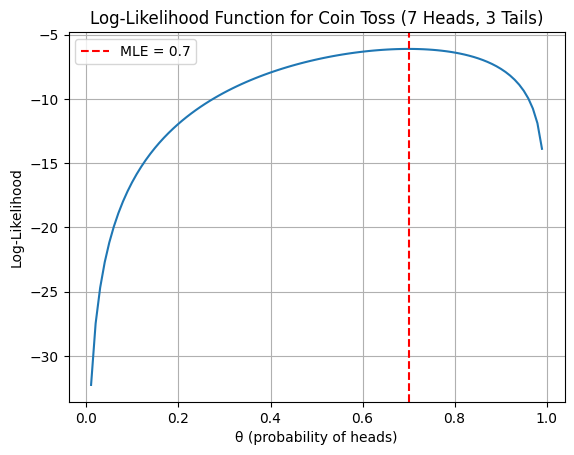

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

theta_vals = np.linspace(0.01, 0.99, 100)
log_likelihood = (7*np.log(theta_vals) + 3*np.log(1-theta_vals))

max_index = np.argmax(log_likelihood)
theta_max=round(100*theta_vals[max_index])/100

plt.plot(theta_vals, log_likelihood)
plt.title("Log-Likelihood Function for Coin Toss (7 Heads, 3 Tails)")
plt.xlabel("θ (probability of heads)")
plt.ylabel("Log-Likelihood")
plt.axvline(x=theta_max, color='red', linestyle='--', label=('MLE = ' + str(theta_max)))
plt.legend()
plt.grid(True)
plt.show()


## Summary of the formulas: 🔣
- **Likelihood:**
$$
L(θ) = ∏ f(x_{i} | θ)
$$
- **Log-likelihood:**
$$
ℓ(θ) = log L(θ)
$$
- **MLE estimate:**
$$
\hat{\theta}_{MLE} = arg \ max_{\theta} ℓ(θ)
$$

## Another Example - MLE for Poisson distribution 📊
**Recall that the probability density function of a** *Poisson distribution* **Pois $\lambda$ with mean $\lambda > 0$ is given by:**
$$
f_{pois}(x) = \frac{\lambda^x \cdot e^{-\lambda}}{x!}
$$
**Consider a dataset comprising of n i.i.d. (independent and identically distributed) samples $x_1,...,x_n \sim Pois(\lambda)$.**

**Find the MLE estimation of the parameter $\lambda$**

The **likelihood** function is:
$$
L(\lambda) =  \prod_i \frac{\lambda^{x_i} \cdot e^{-\lambda}}{{x_i}!} = (e^{-\lambda})^n \cdot \prod_i \frac{\lambda^{x_i}}{{x_i}!}
$$
> ❤ Note: We can multiply them because they are independent.

Now, taking the **log-likelihood:**
> Can someone remind us - why do we take the log?

$$
\ell(\lambda) = \log \left((e^{-\lambda})^n \cdot \prod_i \frac{\lambda^{x_i}}{{x_i}!}\right) = n\cdot\log(e^{-\lambda}) + \sum_i \log(\frac{\lambda^{x_i}}{{x_i}!}) = n\cdot-\lambda + \sum_i \left(\log(\lambda^{x_i}) - \log({x_i}!)\right)
$$

$$
= -\lambda\cdot n +\sum_i x_i\cdot \log(\lambda) - \sum_i \log({x_i}!)
$$
Find the maximum:
$$
\frac{d\ell}{d\lambda} = -n + \sum_i x_i\cdot \frac{1}{\lambda} = -n + \frac{1}{\lambda} \cdot \sum_i x_i
$$
$$
-n + \frac{1}{\lambda} \cdot \sum_i x_i = 0 \Longrightarrow
n = \frac{1}{\lambda} \cdot \sum_i x_i \Longrightarrow
n \cdot \lambda = \sum_i x_i \Longrightarrow
\hat\lambda_{MLE} = \frac{\sum_i x_i}{n} = \bar{x}
$$
This means the most likely value of $\lambda$ is $\bar{x}$

Let's see what it looks like in Python code. Assuming that $\lambda = 4$

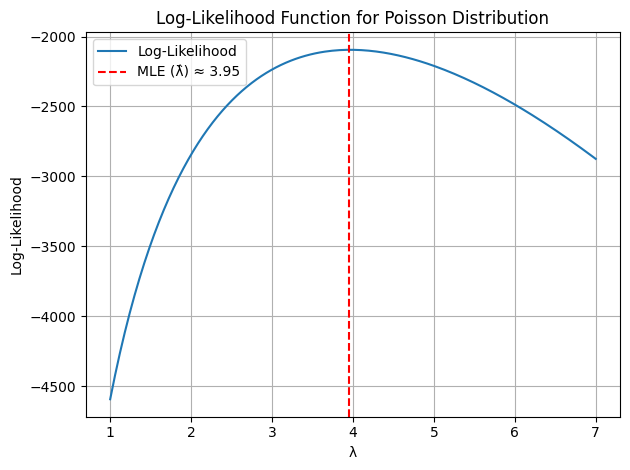

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

# Data generation - Poisson observations
n = 1000
np.random.seed(0)
data = np.random.poisson(lam=4, size=n)
lambda_vals = np.linspace(1, 7, 200)

# Log-likelihood for Poisson distribution
log_likelihood = -lambda_vals * n + np.log(lambda_vals) * np.sum(data) - np.sum(gammaln(data + 1))

# Find λ that maximizes the log-likelihood
idex_max = np.argmax(log_likelihood)
lambda_mle_numerical = lambda_vals[idex_max]

plt.plot(lambda_vals, log_likelihood, label='Log-Likelihood')
plt.axvline(x=lambda_mle_numerical, color='red', linestyle='--', label=f'MLE (λ̂) ≈ {lambda_mle_numerical:.2f}')
plt.title("Log-Likelihood Function for Poisson Distribution")
plt.xlabel("λ")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Another Example - MLE for Normal distribution 📊
**Recall that the probability density function of a** *normal distribution*
**$N(𝜇,σ^2)$ with mean 𝜇 and variance $σ^2$ is given by:**
$$
f_{normal}(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-𝜇)^2}{2σ^2}}
$$
**Consider a dataset comprising of n i.i.d. (independent and identically distributed) samples $x_1,...,x_n \sim N(𝜇,σ^2)$.**

**Find the MLE estimation of the parameters $𝜇, σ^2$**

The **likelihood** function is:
$$
L(\sigma^2,𝜇) = \prod_i \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-𝜇)^2}{2σ^2}} = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \cdot \prod_i e^{-\frac{(x-𝜇)^2}{2σ^2}} = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \cdot e^{-\sum_{i=1}^n \frac{(x_i-𝜇)^2}{2σ^2}}
$$
> ❤ Note: We can multiply them because they are independent.

Now, taking the **log-likelihood:**
$$
\ell(\sigma^2,𝜇) = \log \left(\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \cdot e^{-\sum_{i=1}^n \frac{(x_i-𝜇)^2}{2σ^2}}\right) = \log \left((2\pi\sigma^2)^{-\frac{n}{2}}\right) + \log \left( e^{-\sum_{i=1}^n \frac{(x_i-𝜇)^2}{2σ^2}}\right) = -\frac{n}{2}\cdot\log(2\pi\sigma^2)-\sum_{i=1}^n \frac{(x_i-𝜇)^2}{2σ^2}
$$

Find the maximum:
First, for 𝜇:
$$
\frac{d\ell}{d𝜇} = -\sum_{i=1}^n \frac{2(x_i-𝜇)\cdot-1}{2\sigma^2} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i-𝜇)
$$
$$
\frac{1}{\sigma^2} \sum_{i=1}^n (x_i-𝜇) = 0 \Longrightarrow
\sum_{i=1}^n (x_i-𝜇) = 0 \Longrightarrow
\sum_{i=1}^n x_i -n𝜇=0 \Longrightarrow
n𝜇=\sum_{i=1}^n x_i ⟹
\hat{ 𝜇 }_{MLE} = \frac{\sum_i x_i}{n} = \bar{x}
$$
This means the most likely value of $𝜇$ is $\bar{x}$

>  📌 **Observation:**
>   In both the Poisson and the Gaussian (normal) distributions,  
>   the MLE for the location or rate parameter turns out to be the **sample mean**.
>
>  - For Poisson: $ \hat{\lambda}_{MLE} = \bar{x} $
>  - For Normal: $ \hat{\mu}_{MLE} = \bar{x} $
>
>  This is not a coincidence — it reflects the central role of the mean as the “most likely” representative value of the data in many common distributions.


Second, for $\sigma^2$:
$$
\frac{d\ell}{d\sigma^2} = -\frac{n}{2}\cdot\frac{2\pi}{2\pi\sigma^2} - \sum_{i=1}^n (x_i-𝜇)^2 \cdot -\frac{1}{2\sigma^4} = \frac{1}{2\sigma^4}\sum_{i=1}^n (x_i-𝜇)^2 - \frac{n}{2\sigma^2}
$$
$$
\frac{1}{2\sigma^4}\sum_{i=1}^n (x_i-𝜇)^2 - \frac{n}{2\sigma^2} = 0 \Longrightarrow
\sum_{i=1}^n (x_i-𝜇)^2 -2\sigma^2n = 0 \Longrightarrow
\sum_{i=1}^n (x_i-𝜇)^2 = 2\sigma^2n \Longrightarrow
$$
$$
\hat{ \sigma^2 }_{MLE} = \frac{1}{2n}\sum_{i=1}^n(x_i-\hat{𝜇}_{MLE})^2 = \frac{1}{2n}\sum_{i=1}^n (x_i - \bar{x})^2
$$
This means the most likely value of $\sigma^2$ is $\frac{1}{2n}\sum_{i=1}^n (x_i - \bar{x})^2$

Let's see what it looks like in Python code. Assuming that $𝜇=5, \sigma^2=4$

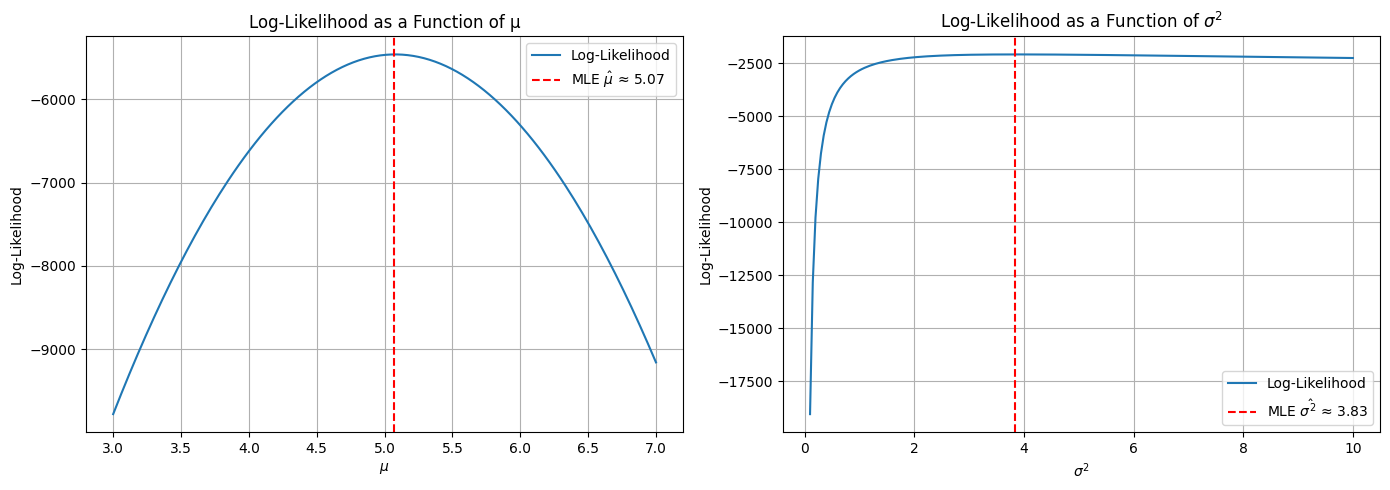

In [ ]:
# Redefine all variables needed for standalone execution

# Step 1: Generate synthetic data
n = 1000
np.random.seed(1)
mu_true = 5
sigma_true = 2
data = np.random.normal(loc=mu_true, scale=sigma_true, size=n)
mu_vals = np.linspace(3, 7, 200)
sigma2_vals = np.linspace(0.1, 10, 200)

sigma2_fixed = np.var(data)
mu_fixed = np.mean(data)

# Log-likelihood for Normal distribution
log_likelihood_mu = -n/2*np.log(2*np.pi*sigma_true**2) -  np.array([np.sum((data - mu)**2) for mu in mu_vals])
log_likelihood_sigma = - (n / 2) * np.log(2 * np.pi * sigma2_vals) - (np.sum(((data - mu_true) ** 2)) / (2 * sigma2_vals))

# Find μ and σ² that maximizes the log-likelihood
mu_max = mu_vals[np.argmax(log_likelihood_mu)]
sigma2_max = sigma2_vals[np.argmax(log_likelihood_sigma)]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# μ subplot
axs[0].plot(mu_vals, log_likelihood_mu, label='Log-Likelihood')
axs[0].axvline(mu_max, color='r', linestyle='--', label=fr'MLE $\hat{{\mu}}$ ≈ {mu_max:.2f}')
axs[0].set_title('Log-Likelihood as a Function of μ')
axs[0].set_xlabel(r'$\mu$')
axs[0].set_ylabel('Log-Likelihood')
axs[0].legend()
axs[0].grid(True)

# σ² subplot
axs[1].plot(sigma2_vals, log_likelihood_sigma, label='Log-Likelihood')
axs[1].axvline(sigma2_max, color='r', linestyle='--', label=fr'MLE $\hat{{\sigma^2}}$ ≈ {sigma2_max:.2f}')
axs[1].set_title('Log-Likelihood as a Function of $\sigma^2$')
axs[1].set_xlabel(r'$\sigma^2$')
axs[1].set_ylabel('Log-Likelihood')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## In The Real World 🌍
According to what we have learned, the first step in calculating MLE is to define our model. But what happens when we **don't know** the true model?

Usually, we have some data - but we don't know which distribution it came from. Still, we want to estimate the parameters. So how do we do that?

First, we consider making an assumption:
We **guess** a possible distribution and **add noise** to it. Let's assume we have two options: either an **exponential distribution** or a **power-law distribution**.

Then, we calculate the parameters for each modle using MLE and compute **AIC value** for both models.

The model with the **lower AIC** is considered the better fit.

But we also want to know **how much better** it is compared to the other model - and that is where the **Akaike weight** comes in.

## What Did I Just Say? 🤔
First, we know how to compute the **MLE** for both distributions - we practiced it.

Next, to compute the **AIC** for each model, we use the formula:
$$
AIC = -2\log(L(\theta))+2k
$$
When θ is the parameter we are trying to estimate using MLE, $L$ is the likelihood function and $k$ is the number of parameters in the model (i.e, how many free parameters our model has)

After selecting the model with the lowest AIC, we evaluate how strong it is compared to the other model by using the **Akaike weight** formula:
$$
w_i=\frac{e^{-\frac{Δ_i}{2}}}{\sum_j e^{-\frac{Δ_j}{2}}}
$$
When $Δ_i = AIC_i-min(AIC)$ (Δᵢ is the difference between the AIC of model i and the lowest AIC among all models).


## Example for this: 📘
**You are given a small dataset of observed values:**
$$
x = [1.0, 2.0, 1.5, 0.8, 2.2]
$$
**You don’t know the true distribution, but you want to fit two candidate models:**
1. *Exponential distribution*: $p(x,\lambda)=\lambda e^{-\lambda x}$
2. *Power-law distribution*: $p(x,\alpha) = \frac{\alpha-1}{x_{min}}\cdot \left(\frac{x}{x_{min}}\right)^{-\alpha}$ for $x≥x_{min}$

**Use MLE to estimate the parameters for both models,
then compute the AIC for each, and finally compute the Akaike weights
to determine which model better fits the data.**

First, estimate λ for the Exponential Model:

The **likelihood** function is:
$$
L(\lambda) = \prod_x \lambda e^{-\lambda x}=\lambda^5\cdot\prod_x e^{-\lambda x} = \lambda^5\cdot e^{-\sum_x \lambda x} = \lambda^5 e^{-\lambda\sum_x x} = \lambda^5 e^{-\lambda\left(1.0+2.0+1.5+0.8+2.2\right)} = \lambda^5\cdot e^{-7.5\lambda}
$$

Now, taking the **log-likelihood:**
$$
\ell(\lambda) = \log \left(\lambda^5\cdot e^{-7.5\lambda}\right) = 5\log\lambda - 7.5\lambda \log e = 5\log\lambda - 7.5\lambda
$$

Find the maximum:
$$
\frac{d\ell}{d\lambda} = \frac{5}{\lambda} - 7.5
$$
$$
\frac{5}{\lambda} - 7.5 = 0 \Longrightarrow
5-7.5\lambda=0 \Longrightarrow
7.5\lambda=5 \Longrightarrow
\hat \lambda _ {MLE}=\frac{2}{3}
$$

Second, estimate α for the Power-law Model:

The **likelihood** function is:
$$
L(\alpha) = \prod_x \frac{\alpha-1}{x_{min}}\cdot \left(\frac{x}{x_{min}}\right)^{-\alpha}=\left(\frac{\alpha-1}{x_{min}}\right)^5\cdot \prod_x \left(\frac{x}{x_{min}}\right)^{-\alpha} = \left(\frac{\alpha-1}{0.8}\right)^5\cdot \left(\frac{1}{0.8}\right)^{-\alpha}\cdot \left(\frac{2}{0.8}\right)^{-\alpha}\cdot \left(\frac{1.5}{0.8}\right)^{-\alpha}\cdot \left(\frac{0.8}{0.8}\right)^{-\alpha}\cdot \left(\frac{2.2}{0.8}\right)^{-\alpha}=\left(\frac{\alpha-1}{0.8}\right)^5\cdot \left(\frac{5}{4}\right)^{-\alpha}\cdot \left(\frac{5}{2}\right)^{-\alpha}\cdot \left(\frac{15}{8}\right)^{-\alpha}\cdot 1^{-\alpha}\cdot \left(\frac{11}{4}\right)^{-\alpha}=\left(\frac{\alpha-1}{0.8}\right)^5\cdot 16.113^{-\alpha}
$$

Now, taking the **log-likelihood:**
$$
\ell(\alpha) = \log \left(\left(\frac{\alpha-1}{0.8}\right)^5\cdot 16.113^{-\alpha}\right)=5\log \left(\frac{\alpha-1}{0.8}\right)-\alpha\log(16.113)=5log(\alpha-1)-5log(0.8)-\alpha\log(16.113)
$$

Find the maximum:
$$
\frac{d\ell}{d\alpha} = 5\cdot\frac{1}{\alpha-1}-log(16.113)
$$
$$
5\cdot\frac{1}{\alpha-1}-log(16.113) = 0 \Longrightarrow
5-(\alpha-1)\cdot 2.7796=0 \Longrightarrow
5-2.7796\alpha+2.7796=0 \Longrightarrow
2.7796\alpha=7.7796\Longrightarrow
\hat \alpha_{MLE}=2.799
$$

Now we want to compute the AIC value for each model:
> Remember that the formula is: $AIC = -2\log(L(\theta))+2k$

**For exponential distribution:**
$$
logL(\lambda)=\ell(\lambda)=5\log\lambda - 7.5\lambda
$$
We have one free parameter so $k=1$ and we calculated that $\hat\lambda_{MLE}=\frac{2}{3}$ so:
$$
AIC_{exp}=-2\left(5\log(\frac{2}{3}) - 7.5\cdot\frac{2}{3}\right)+2=16.055
$$
**For power-law distribution:**
$$
logL(\alpha)=\ell(\alpha)=5log(\alpha-1)-5log(0.8)-\alpha\log(16.113)
$$
We have one free parameter so $k=1$ and we calculated that $\hat\alpha_{MLE}=2.799$ so:
$$
AIC_{pl}=-2\left(5log(2.799-1)-5log(0.8)-2.799\cdot\log(16.113)\right)+2=9.456
$$
As we can see $AIC_{pl} < AIC_{exp}$. Therefore, we select the power-law model as the better fit.

Now, let's calculate the Akaike weights with the formula:
$$
w_i=\frac{e^{-\frac{Δ_i}{2}}}{\sum_j e^{-\frac{Δ_j}{2}}}
$$
We are going to calculate the $Δ_i$ for each model:

**For exponential distribution:**
$$
Δ_{exp}=16.055-9.456=6.599
$$
**For power-law distribution:**
$$
Δ_{pl}=9.456-9.456=0
$$
Now, we compute Akaike weights:

**For exponential distribution:**
$$
w_{exp}=\frac{e^{-\frac{6.599}{2}}}{e^{-\frac{6.599}{2}}+ e^{-\frac{0}{2}}}=\frac{0.0369}{1.0369}=0.0355
$$
**For power-law distribution:**
$$
w_{pl}=\frac{e^{-\frac{0}{2}}}{e^{-\frac{6.599}{2}}+ e^{-\frac{0}{2}}}=\frac{1}{1.0369}=0.9644
$$

The power-law has a **96.4%** probability of being the better fit, while the exponential model has only about **3.5%**.

Here's a simulation in Python

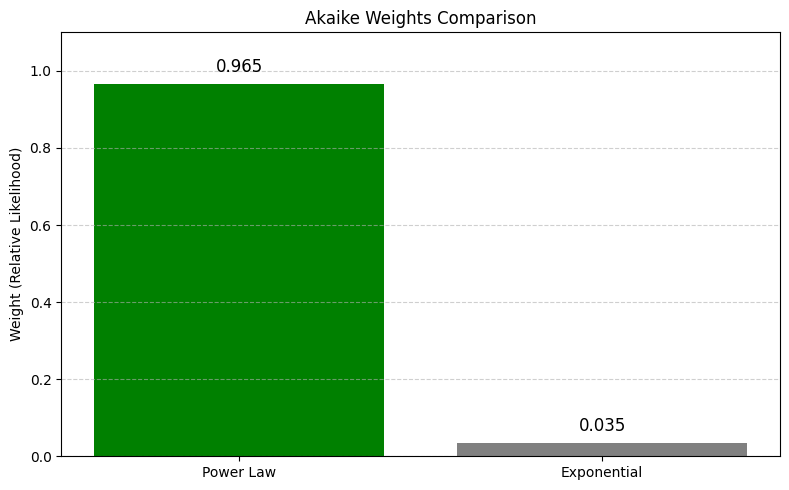

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# AIC values from previous calculation
aic_pl = 9.40
aic_exp = 16.06

# Calculate delta AIC
delta_pl = aic_pl - min(aic_pl, aic_exp)
delta_exp = aic_exp - min(aic_pl, aic_exp)

# Akaike weights
weight_pl = np.exp(-delta_pl / 2)
weight_exp = np.exp(-delta_exp / 2)

sum_weights = weight_pl + weight_exp
w_pl = weight_pl / sum_weights
w_exp = weight_exp / sum_weights

# Plotting
labels = ['Power Law', 'Exponential']
weights = [w_pl, w_exp]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, weights, color=['green', 'gray'])
plt.title("Akaike Weights Comparison")
plt.ylabel("Weight (Relative Likelihood)")
plt.ylim(0, 1.1)

# Annotate values
for bar, weight in zip(bars, weights):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{weight:.3f}",
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()